This notebook uses RF to do image classification.

# 1. Load data

In [1]:
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# functions to show an image
def imshow(img):
    npimg = np.array(img)
    plt.imshow(npimg)

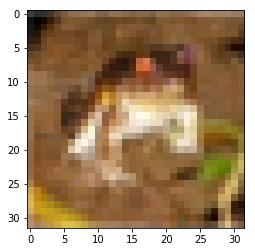

In [4]:
imshow(trainset[0][0])

# 2. Preprocess images: grayscale conversion + feature extraction

In [5]:
import cv2
from cyvlfeat.sift.dsift import dsift

In [6]:
# preprocess images from training set
trftr = np.zeros((len(trainset), 128))
trlb = np.zeros((len(trainset),1), dtype=np.int)
for i in range(len(trainset)):
    npimg = np.array(trainset[i][0])
    gray= cv2.cvtColor(npimg,cv2.COLOR_BGR2GRAY)
    _, dec = dsift(gray, size=8, step=8)
    trftr[i] = dec
    trlb[i, 0] = trainset[i][1]

In [7]:
np.save('./RF/trftr.npy', trftr)
np.save('./RF/trlb.npy', trlb)

In [8]:
# preprocess images from testing set
tsftr = np.zeros((len(testset), 128))
tslb = np.zeros((len(testset),1), dtype=np.int)
for i in range(len(testset)):
    npimg = np.array(testset[i][0])
    gray= cv2.cvtColor(npimg,cv2.COLOR_BGR2GRAY)
    _, dec = dsift(gray, size=8, step=8)
    tsftr[i] = dec
    tslb[i, 0] = testset[i][1]

In [9]:
np.save('./RF/tsftr.npy', tsftr)
np.save('./RF/tslb.npy', tslb)

# 3. Preprocess images: normalization + PCA
# 4. Classify images with RF 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
accuracyList = []
class_accuracyList = []
NUMPCA = [2, 4, 8, 16, 32, 64, 128]
NUMTREES = [1, 10, 100, 1000]


for i in range(len(NUMPCA)):
    for j in range(len(NUMTREES)):
        numPCA = NUMPCA[i]
        numTrees = NUMTREES[j]
        print('numPCA:', numPCA)
        print('numTrees: ', numTrees)

        # load training and test dataset
        trftr = np.load('./RF/trftr.npy')
        trlb = np.load('./RF/trlb.npy')
        tsftr = np.load('./RF/tsftr.npy')
        tslb = np.load('./RF/tslb.npy')

        # standardizing the features (mean = 0 and variance = 1)
        strftr = StandardScaler().fit_transform(trftr)
        stsftr = StandardScaler().fit_transform(tsftr)

        # identify principal components
        pca = PCA(n_components = numPCA)
        trPCs = pca.fit_transform(strftr)
        tsPCs = pca.fit_transform(stsftr)

        # use RF to do image classification
        rfclassifier = RandomForestClassifier(n_estimators=numTrees)
        rfclassifier.fit(trPCs, trlb[:,0])
        

        # make predictions
        lb_pred = rfclassifier.predict(tsPCs)

        # generate confusion matrix
        cm = confusion_matrix(tslb, lb_pred)
        
        # calculate accuracy
        accuracy = 100 * accuracy_score(tslb, lb_pred)
        accuracyList.append(accuracy)
        class_accuracy = 100 * cm.diagonal() / 1000
        class_accuracyList.append(class_accuracy)

# # write output
np.savetxt("./RF/accuracyList.csv",accuracyList, delimiter=",", fmt='%s')
np.savetxt("./RF/class_accuracyList.csv",class_accuracyList, delimiter=",", fmt='%s')

numPCA: 2
numTrees:  1
numPCA: 2
numTrees:  10
numPCA: 2
numTrees:  100
numPCA: 2
numTrees:  1000
numPCA: 4
numTrees:  1
numPCA: 4
numTrees:  10
numPCA: 4
numTrees:  100
numPCA: 4
numTrees:  1000
numPCA: 8
numTrees:  1
numPCA: 8
numTrees:  10
numPCA: 8
numTrees:  100
numPCA: 8
numTrees:  1000
numPCA: 16
numTrees:  1
numPCA: 16
numTrees:  10
numPCA: 16
numTrees:  100
numPCA: 16
numTrees:  1000
numPCA: 32
numTrees:  1
numPCA: 32
numTrees:  10
numPCA: 32
numTrees:  100
numPCA: 32
numTrees:  1000
numPCA: 64
numTrees:  1
numPCA: 64
numTrees:  10
numPCA: 64
numTrees:  100
numPCA: 64
numTrees:  1000
numPCA: 128
numTrees:  1
numPCA: 128
numTrees:  10
numPCA: 128
numTrees:  100
numPCA: 128
numTrees:  1000


# 5. Pick a RF classifier and plot the confusion matrix

In [18]:
import seaborn as sn

In [19]:
NUMPCA = [16]
NUMTREES = [1000]

for i in range(len(NUMPCA)):
    for j in range(len(NUMTREES)):
        numPCA = NUMPCA[i]
        numTrees = NUMTREES[j]   

        # load training and test dataset
        trftr = np.load('./RF/trftr.npy')
        trlb = np.load('./RF/trlb.npy')
        tsftr = np.load('./RF/tsftr.npy')
        tslb = np.load('./RF/tslb.npy')

        # standardizing the features (mean = 0 and variance = 1)
        strftr = StandardScaler().fit_transform(trftr)
        stsftr = StandardScaler().fit_transform(tsftr)

        # identify principal components
        pca = PCA(n_components = numPCA)
        trPCs = pca.fit_transform(strftr)
        tsPCs = pca.fit_transform(stsftr)

        # use RF to do image classification
        rfclassifier = RandomForestClassifier(n_estimators=numTrees)
        rfclassifier.fit(trPCs, trlb[:,0])
        

        # make predictions
        lb_pred = rfclassifier.predict(tsPCs)

        # generate confusion matrix
        cm = confusion_matrix(tslb, lb_pred)


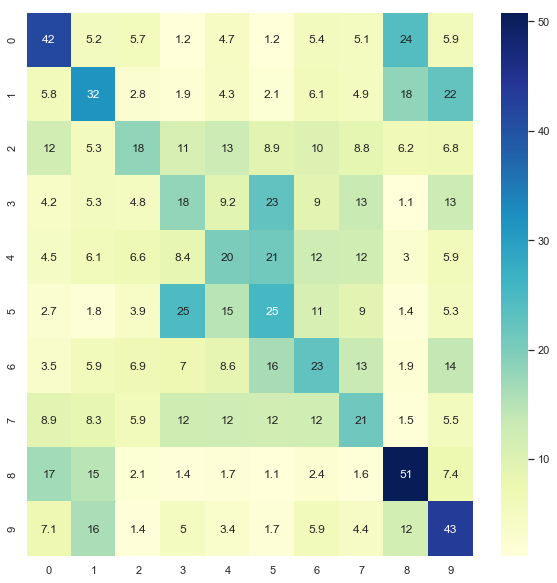

In [20]:
plt.figure(figsize = (10,10))
sn.set(font_scale=1)
sn.heatmap(100*cm/1000, cmap="YlGnBu", annot = True)